# NoLinear Classification

In [4]:
# All imports
import torch 
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display

torch.manual_seed(42)

torch.Size([100, 2]) torch.Size([100])


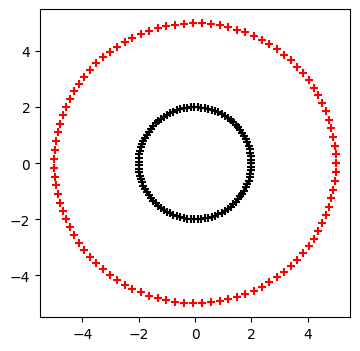

In [5]:
from math import cos, pi, sin

# plt.figure(figsize=(400,400))

def generate_dataset(n,r12=2,r34=5):
    half = n / 2
    theta=torch.linspace(0,4*pi,n).reshape(-1,1)


    x1 = torch.cos(theta)
    x2 = torch.sin(theta)
    y12 = torch.zeros(n)
    X1 = torch.tensor(np.array([x1,x2]).T).squeeze()*r12
    Y1 = y12

    x3 = torch.cos(theta)
    x4 = torch.sin(theta)
    y34 = torch.ones(n)
    X2 = torch.tensor(np.array([x3,x4]).T).squeeze()*r34
    Y2 = y34

    # Stack X1 and X2 tensors along with Y1 and Y2 tensors
    X = torch.cat((X1, X2), dim=0)  # Stack X1 and X2 along dimension 0
    Y = torch.cat((Y1, Y2), dim=0)  # Stack Y1 and Y2 along dimension 0


    return X1,Y1,X2,Y2, X,Y

X1,Y1,X2,Y2,X,Y = generate_dataset(100)

print(X1.shape , Y1.shape)

plt.figure(figsize=(4, 4))  
plt.scatter(X1[:,0],X1[:,1],marker='+',c='k')
plt.scatter(X2[:,0],X2[:,1],marker='+',c='r')


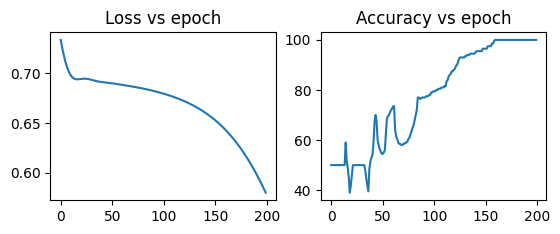

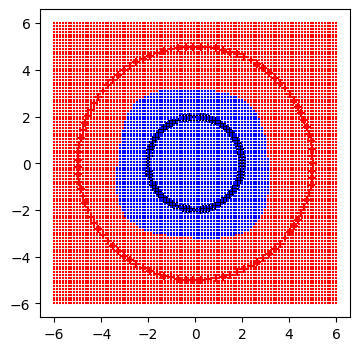

In [6]:
# define model and plot the model

from time import sleep

def generate_actual_data_plot():
    plt.figure(figsize=(4, 4))  
    plt.scatter(X1[:,0],X1[:,1],marker='+',c='k')
    plt.scatter(X2[:,0],X2[:,1],marker='+',c='r')

def getXtoPlot():
    x1_min , x1_max = X[:,0].min() ,  X[:,0].max()
    x2_min , x2_max = X[:,1].min() ,  X[:,1].max()
    plot_diff = 1
    x1_lin = torch.linspace(x1_min-plot_diff , x1_max+plot_diff, 100)
    x2_lin = torch.linspace(x2_min-plot_diff , x2_max+plot_diff, 100)
    xx_1 , xx_2 = torch.meshgrid(x1_lin,x2_lin)
    
    xx_1_flat = xx_1.flatten().unsqueeze(dim=1)
    xx_2_flat = xx_2.flatten().unsqueeze(dim=1)

    X_grid = torch.hstack((xx_1_flat,xx_2_flat)) # we are stacking them horizontally
    
    print(xx_1_flat.shape, xx_2_flat.shape, X_grid.shape)
    return X_grid


X_grid = getXtoPlot()


def generate_boundary_plot(model):
    Z = model(X_grid)
    Z = Z > 0.5

    zero_indices = (Z==False).squeeze()
    one_indices = (Z==True).squeeze()

    plt.scatter(X_grid.numpy()[zero_indices,0],X_grid.numpy()[zero_indices,1],s=1,marker='+',c='b')
    plt.scatter(X_grid.numpy()[one_indices,0],X_grid.numpy()[one_indices,1],s=1,marker='+',c='r')


    


n_samples , n_features = X.shape

model = nn.Sequential(
    nn.Linear(n_features,64),
    nn.Sigmoid(),
    nn.Linear(64,32),
    nn.Sigmoid(),
    nn.Linear(32,1),
    nn.Sigmoid(),
)





criteria =  nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

epochs = 200
losses = []
accuracies=[]

for epoch in range(epochs):
    optimizer.zero_grad()
    ouput = model(X)
    loss = criteria(ouput,Y.float().unsqueeze(dim=1))
    accuracy = (sum(abs(ouput - (Y.float().unsqueeze(dim=1))) < 0.5 ))/len(ouput)*100
    accuracies.append(accuracy)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    plt.subplot(2,2,1)
    plt.title('Loss vs epoch')
    plt.plot(losses)

    plt.subplot( 2,2,2)
    plt.title('Accuracy vs epoch')
    plt.plot(accuracies)



    generate_actual_data_plot()
    generate_boundary_plot(model)

    plt.show()
    sleep(0.2)
    if epoch != epochs -1 :
        display.clear_output(wait=True) 

    
